In [1]:
import numpy as np
from scipy.spatial import distance
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Generating a synthetic dataset
X, y = ds.make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Adding some anomalous data
rng = np.random.default_rng(seed=42)
anomalous_data = rng.uniform(low=-3, high=0, size=(50, 2))
X = np.vstack([X, anomalous_data])
y = np.hstack([y, np.ones(anomalous_data.shape[0])])

In [3]:
# Split the combined data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
class vdnsa:
    
    # Initialize the class
    def __init__(self):
        self.detectors = []
    
    def fit(self, X_normal):
        max_detectors = 1000 # Maximum number of detectors allowed
        for _ in range(max_detectors):  # Maximum number of detectors allowed
            candidate_detector = np.random.uniform(low=-5, high=4, size=X_normal.shape[1]) # Generate a random detector
            distances = [distance.euclidean(candidate_detector, x) for x in X_normal] # Distance of the detector from all self points
            min_distance = min(distances) - 0.3 # The self points are given a padding of 0.3 so that a detector is not generated too close to them, can change the padding accordingly
            
            '''For overlapping detectors, use the below code:
            
            if all(d > min_distance for d in distances) and min_distance > 0.1: # Check if the detector is valid
                self.detectors.append((candidate_detector, min_distance)) # Add the detector and its radius to the list of detectors
            '''
            
            # For non-overlapping detectors, use the below code:
            
            
            if all(d > min_distance for d in distances) and min_distance > 0.1: # Check if the detector is valid
                if len(self.detectors) == 0: # If this is the first detector, add it to the list of detectors
                    self.detectors.append((candidate_detector, min_distance)) # Add the detector and its radius to the list of detectors
                    
                else: # If this is not the first detector, check if it overlaps with any of the existing detectors
                    overlaps = False # Initialize the overlaps flag
                    for detector, radius in self.detectors:
                        if distance.euclidean(candidate_detector, detector) < radius + min_distance: # If the detector overlaps with any of the existing detectors, set the overlaps flag to True, and we don't need the padding for detectors
                            overlaps = True
                            break
                    if not overlaps: # If the detector does not overlap with any of the existing detectors, add it to the list of detectors
                        self.detectors.append((candidate_detector, min_distance))
                    
            

    def predict(self, X): # Predict if a point is an anomaly
        predictions = [] # Initialize the list of predictions
        for x in X:
            is_anomaly = any(distance.euclidean(x, detector) <= radius for detector, radius in self.detectors) # Check if the point is within the radius of any detector
            predictions.append(int(is_anomaly))
        return np.array(predictions)


In [19]:
model = vdnsa() # Running the model
model.fit(X_train[y_train == 0]) # Fit the model on the normal data
y_pred = model.predict(X_test) # Predict on the test data 
print(f"Accuracy: {np.mean(y_pred == y_test) * 100} %") # Print the accuracy
print(f"Number of detectors: {len(model.detectors)}") # Print the detectors

Accuracy: 98.18181818181819 %
Number of detectors: 22


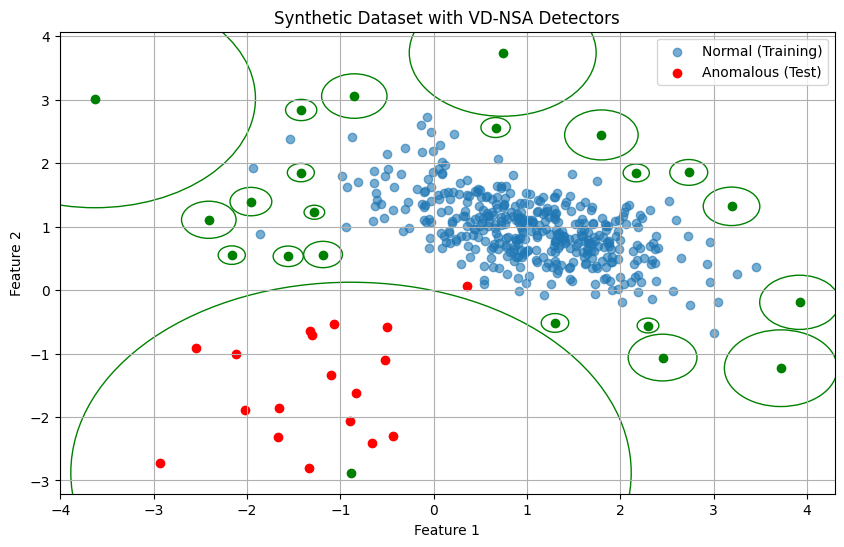

In [20]:
# Visualize the dataset along with the detectors
plt.figure(figsize=(10, 6))

# Plot normal and anomalous data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Normal (Training)', alpha=0.6)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Anomalous (Test)', c='red')

# Plot the detectors generated by the RVNS algorithm
for detector, radius in model.detectors:
    circle = plt.Circle(detector, radius, color='green', fill=False)
    plt.gcf().gca().add_artist(circle)
    plt.plot(*detector, 'go')  # Add the center of the circle

plt.title('Synthetic Dataset with VD-NSA Detectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()